## SP Practical
### Richa kachhiya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("C:/Users/StatLab/Desktop/Richa kachhiya - SP Lab Practical .csv")
df

,Sales,RnD,Profits
0,374342.0,2716.0,234662.0
1,51639.0,816.0,53510.0
2,109899.0,2277.0,75168.0
3,132934.0,2294.0,34645.0
4,273377.0,34839.0,127639.0
5,90176.0,1760.0,96162.0
6,174165.0,1375.0,155801.0
7,230941.0,8531.0,143472.0
8,91010.0,4955.0,34004.0
9,176054.0,18724.0,81317.0


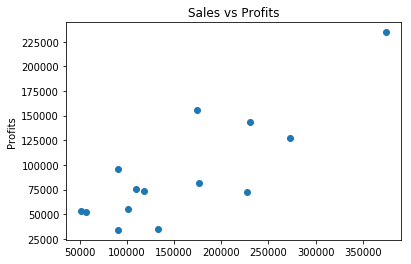

In [15]:
plt.figure()
plt.title("Sales vs Profits")
plt.scatter(df.Sales,df.Profits)
plt.ylabel('Profits')
plt.show()


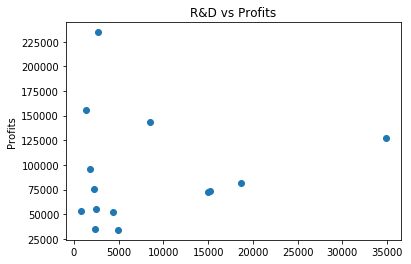

In [16]:
plt.figure()
plt.title("R&D vs Profits")
plt.scatter(df.RnD,df.Profits)
plt.ylabel('Profits')
plt.show()


In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [18]:
y = df["Profits"].tolist()
x = df["Sales"].tolist()
df_model = sm.OLS(y,x).fit()

In [19]:
df_model.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     141.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.36e-08
Time:                        09:29:07   Log-Likelihood:                -164.64
No. Observations:                  14   AIC:                             331.3
Df Residuals:                      13   BIC:                             331.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5645      0.048     11.881      0.000       0.462       0.667
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.331
Skew:                          -0.174   Prob(JB):                        0.848
Kurtosis:                       2.332   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def test_model(col):
    s = []
    for i in col:
        a = [1,i]
        s.append(a)
    return(np.array(s))
prof_model = test_model(df['Profits'])


In [25]:
# HYPOTHESIS :
# H0 : Homoscedasticity is present the residuals are distributed with eqaul variance
# H1 : Hetroscedasticity is present the residuals are not distributed with eqaul variance

# BP test :
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df_model.resid,prof_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
0.6159750819513707


In [26]:
#Removing Hetroscedasticity 
#Log transform

df['Log_Profits'] = np.log(df['Profits'])
f = 'Log_Profits~Sales'
df_model = ols(formula=f,data=df).fit()


In [27]:
Log_NOX_model = test_model(df['Log_Profits'])
bp_test = het_breuschpagan(df_model.resid,Log_NOX_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
0.2915033957441444


In [30]:
#Box cox transform

from scipy import stats
x,_ = stats.boxcox(df['Profits'])
df['trans_Profits'] = x
f = 'trans_Profits~Sales'
df_model = ols(formula=f,data = df).fit()



C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


In [31]:
# Using the same 2d reshaping function as the previous step

trans_Profits_model = test_model(df['trans_Profits'])
bp_test = het_breuschpagan(df_model.resid,trans_Profits_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
0.9999999555139145


C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
